In [1]:
import pandas as pd
import numpy as np

from scipy import stats as st

import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import os

pd.options.display.float_format = '{:.2f}'.format

pth1 = '/Users/vadimhlebnikov/Downloads/messages.csv'
pth2 = '/datasets/messages.csv'

if os.path.exists(pth1):
    messages = pd.read_csv('/Users/vadimhlebnikov/Downloads/messages.csv')
    calls = pd.read_csv('/Users/vadimhlebnikov/Downloads/calls.csv')
    internet = pd.read_csv('/Users/vadimhlebnikov/Downloads/internet.csv')
    tariffs = pd.read_csv('/Users/vadimhlebnikov/Downloads/tariffs.csv')
    users = pd.read_csv('/Users/vadimhlebnikov/Downloads/users.csv')
elif os.path.exists(pth2):
    messages = pd.read_csv('/datasets/messages.csv')
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
else:
    print('Something is wrong')

## Содержание
* [Изучение данных из файлов](#chapter1)
* [Предобработка данных](#chapter2)
* [Исследовательский анализ данных](#chapter3)
 * [Подготовка данных](#chapter3.1)
 * [Анализ данных](#chapter3.2)
 * [Проверка гипотез](#chapter3.3)
* [Общий вывод](#chapter4)

## Изучение данных из файлов <a class ="anchor" id="chapter1"></a>

In [2]:
#Проверяем наличие пропусков в датафреймах
dfs = [messages,calls,internet,tariffs,users]
for df in dfs:
    print(df.isna().sum())
    print('-------------//-------------')


id              0
message_date    0
user_id         0
dtype: int64
-------------//-------------
id           0
call_date    0
duration     0
user_id      0
dtype: int64
-------------//-------------
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
-------------//-------------
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
-------------//-------------
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
-------------//-------------


In [3]:
for df in dfs:
    print(df.info())
    print('-------------//-------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
-------------//-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
-------------//-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null C

In [4]:
#проверяем дубликаты
dfs = [messages,calls,internet,tariffs,users]
for df in dfs:
    print(df.duplicated().sum())

0
0
0
0
0


### Вывод
Представленные датафреймы характеризуются сравительно небольшим объемом пропусков. Они присутствуют только в столбце users['churn_date'] и могут быть легко заменены. Кроме того, стоит удалить дублирующий столбец internet ['Unnamed: 0']. Также в датафреймах указан некорректный тип файлов с датами, его нужно изменить. Явных дубликатов нет.

## Предобработка данных <a class ="anchor" id="chapter2"></a>

### Заполнение пропусков и изменение типов данных

In [5]:
#Заполняем единственный столбец с пропусками
users = users.fillna('действующий')

In [6]:
messages['message_date'] = pd.to_datetime(messages.message_date,format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls.call_date,format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet.session_date,format='%Y-%m-%d')


In [7]:
#Проверка
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [8]:
#Удаляем дублирующий столбец 
internet = internet.drop(columns=['Unnamed: 0'])
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [9]:
#проверяем на неявные дубликаты 
sorted_city = users['city'].unique().tolist()
sorted_city.sort()
sorted_city

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

Данные переведены в корретный формат. Наявных дубликатов не выявлено. 

 ## Исследовательский анализ данных <a class ="anchor" id="chapter3"></a>

In [10]:
#анализируем основные характеристики выборок. Явно ошибочных значений не выявлено
dfs = [messages,calls,internet,tariffs,users]
for df in dfs:
    print(df.describe())
    print('-------------//-------------')

        user_id
count 123036.00
mean    1256.99
std      143.52
min     1000.00
25%     1134.00
50%     1271.00
75%     1381.00
max     1499.00
-------------//-------------
       duration   user_id
count 202607.00 202607.00
mean       6.76   1253.94
std        5.84    144.72
min        0.00   1000.00
25%        1.30   1126.00
50%        6.00   1260.00
75%       10.70   1379.00
max       38.00   1499.00
-------------//-------------
        mb_used   user_id
count 149396.00 149396.00
mean     370.19   1252.10
std      278.30    144.05
min        0.00   1000.00
25%      138.19   1130.00
50%      348.01   1251.00
75%      559.55   1380.00
max     1724.83   1499.00
-------------//-------------
       messages_included  mb_per_month_included  minutes_included  \
count               2.00                   2.00              2.00   
mean              525.00               23040.00           1750.00   
std               671.75               10861.16           1767.77   
min                50.00 

### Подготовка данных <a class ="anchor" id="chapter3.1"></a>

<AxesSubplot:>

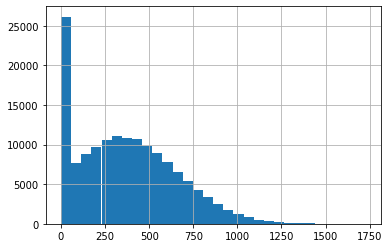

In [11]:
internet['mb_used'].hist(bins=30)

In [12]:
#Функция, убирающая выбросы
def drop_ej(df, field_name):
    distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > distance + np.percentile(df[field_name], 75)].index, inplace=True)
    df.drop(df[df[field_name] < np.percentile(df[field_name], 25) - distance].index, inplace=True)
#Образаем выбросы по длительности звонков и использованию интеренета    
drop_ej(calls,'duration')
drop_ej(internet,'mb_used')

<AxesSubplot:>

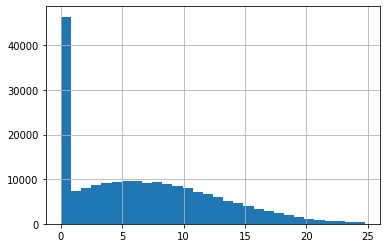

In [13]:
calls['duration'].hist(bins=30)

In [14]:
#уберем в данных по интенету нулевые сессии
internet = internet.query('mb_used != 0')

<AxesSubplot:>

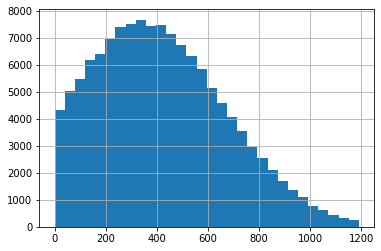

In [15]:
internet['mb_used'].hist(bins=30)

In [16]:
#округляем в большую сторону звонки

calls['duration'] = np.ceil(calls['duration'])

In [17]:
#добавляем стобцы с месяцами
calls['month'] = calls['call_date'].dt.month 
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

<AxesSubplot:xlabel='month'>

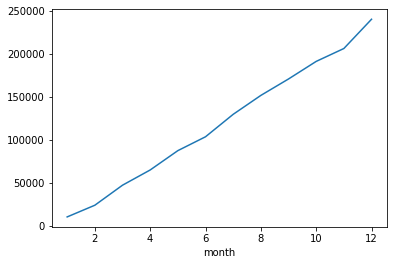

In [18]:
calls.pivot_table(index=['month'],aggfunc='sum')['duration'].plot()

<AxesSubplot:xlabel='month'>

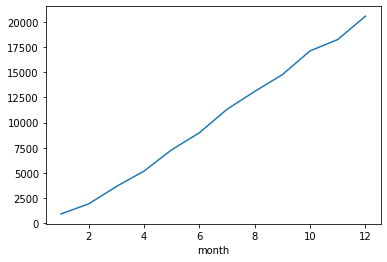

In [19]:
messages.pivot_table(index=['month'],aggfunc='count')['id'].plot() 

<AxesSubplot:xlabel='month'>

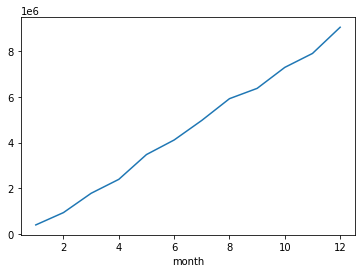

In [20]:
internet.pivot_table(index=['month'],aggfunc='sum')['mb_used'].plot()

In [21]:
# создаем сводные таблицы по user_id и месяцам
internet_pivot = pd.pivot_table(data=internet,index=['user_id','month'],aggfunc='sum')
calls_pivot = pd.pivot_table(data=calls,index=['user_id','month'],aggfunc='sum')
messages_pivot = pd.pivot_table(data=messages,index=['user_id','month'],aggfunc='count')

messages_pivot = messages_pivot.drop(columns = 'id')

#Объединяем сводные таблицы
messages_pivot.columns = messages_pivot.columns.str.replace("message_date", "sms")
merged = calls_pivot.merge(messages_pivot,left_index=True,right_index=True,how='outer')
merged = merged.merge(internet_pivot,left_index=True,right_index=True,how='outer')

# Переводм месячное значение интернет-трафика в гигабайты и округляем в большую сторону с удалением "старой" колонки
merged['gb_used'] = np.ceil(merged['mb_used']/1024)
#merged = merged.drop(columns=['mb_used'])

merged.reset_index()

#присоединяем к датафрейму данные клиентов
merged = merged.merge(users, on='user_id',how='outer')

   







<AxesSubplot:xlabel='month'>

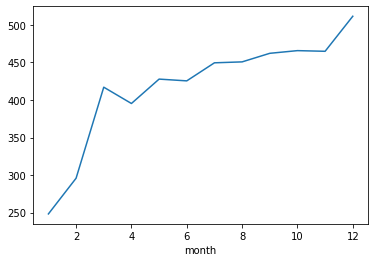

In [22]:
#Построим графики помоесячного потребления различных услуг абонентами

calls_pivot.reset_index().groupby('month').aggregate('mean')['duration'].plot()

<AxesSubplot:xlabel='month'>

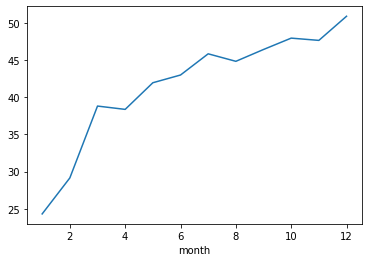

In [23]:
messages_pivot.reset_index().groupby('month').aggregate('mean')['sms'].plot()

<AxesSubplot:xlabel='month'>

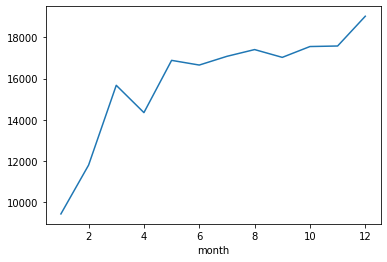

In [24]:
internet_pivot.reset_index().groupby('month').aggregate('mean')['mb_used'].plot()

Как видно из представленных выше графиков, согласно прредложенным к обработке данным, потребление телекоммуникационных услуг растет от начала к концу года.

In [25]:
merged.isna().sum()

user_id         0
duration       42
sms           499
mb_used        15
gb_used        15
age             0
churn_date      0
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [26]:
merged = merged.fillna(0)


In [27]:
merged.isna().sum()

user_id       0
duration      0
sms           0
mb_used       0
gb_used       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

In [28]:
#Вспомогательная функция для подсчета превышения тарифного плана (обращает отрицательные значения в ноль)
def negative_number_to_zero(n):
    if n < 0:
        return 0
    else:
        return n
    
#Создаем столбцы с выручкой в зависимости от тарифного плана    
merged ['smart'] = (merged['duration'] - tariffs.loc[0,'minutes_included']).apply(negative_number_to_zero)*tariffs.loc[0,'rub_per_minute'] + (merged['sms'] - tariffs.loc[0,'messages_included']).apply(negative_number_to_zero)*tariffs.loc[0,'rub_per_message'] + (merged['gb_used'] - tariffs.loc[0,'mb_per_month_included']/1024).apply(negative_number_to_zero)*tariffs.loc[0,'rub_per_gb'] + tariffs.loc[0,'rub_monthly_fee']
merged['ultra'] = (merged['duration'] - tariffs.loc[1,'minutes_included']).apply(negative_number_to_zero)*tariffs.loc[1,'rub_per_minute'] + (merged['sms'] - tariffs.loc[1,'messages_included']).apply(negative_number_to_zero)*tariffs.loc[1,'rub_per_message'] + (merged['gb_used'] - tariffs.loc[1,'mb_per_month_included']/1024).apply(negative_number_to_zero)*tariffs.loc[1,'rub_per_gb'] + tariffs.loc[1,'rub_monthly_fee']    
    
                                                       

In [29]:
#Добавляем столбец с расчетом выручки по каждому клиенту

def revenue_summizer(line): 
    if line['tariff'] == 'ultra':
        return line['ultra']
    else:
        return line['smart']
    
merged['revenue'] = merged.apply(revenue_summizer, axis=1)

### Анализ данных <a class ="anchor" id="chapter3.2"></a>

In [30]:
# выделим пользоавтелей тарифа "Смарт" и дадим характеристику рспределений по каждой из услуг, а также по выручке на клиента.
smart_df = merged.query('tariff == "smart"')

In [31]:
metrics = ['duration','sms','gb_used','revenue']
for i in metrics:
    print(smart_df[i].describe())
    print('Дисперсия', np.var(smart_df[i], ddof=1))

count   2230.00
mean     411.99
std      187.73
min        0.00
25%      279.00
50%      414.00
75%      539.00
max     1435.00
Name: duration, dtype: float64
Дисперсия 35242.19319105875
count   2230.00
mean      33.37
std       28.23
min        0.00
25%       10.00
50%       28.00
75%       51.00
max      143.00
Name: sms, dtype: float64
Дисперсия 796.9552557301128
count   2230.00
mean      16.23
std        5.73
min        0.00
25%       13.00
50%       16.00
75%       20.00
max       38.00
Name: gb_used, dtype: float64
Дисперсия 32.835622561948384
count   2230.00
mean    1267.67
std      804.99
min      550.00
25%      550.00
50%      989.00
75%     1730.00
max     6692.00
Name: revenue, dtype: float64
Дисперсия 648006.9182466348


В среднем пользователю тарифа "Смарт" в месяц требуется 412 минут разговора, 33 смс и 16.2 гб интернет-трафика. **Медиана соответственно составляет 414 минут, 28 смс и 16 гб**. То есть средний клиент укладывается в норматив тарифного плана по звонкам и смс, но докупает около 1 гб в месяц. Стандартное отклонение:188, 28 и 6 соответственно (дисперсия:35242, 797, 33). Медианный месячный платеж клиента тарифа "Смарт" почти вдвое превышает стоимость тарифного плана.

In [32]:
# выделим пользоавтелей тарифа "Ультра" и дадим характеристику рспределений по каждой из услуг, а также по выручке на клиента.
ultra_df = merged.query('tariff == "ultra"')
for i in metrics:
    print(ultra_df[i].describe())
    print('Дисперсия', np.var(ultra_df[i], ddof=1))

count    986.00
mean     518.38
std      313.51
min        0.00
25%      278.00
50%      505.50
75%      744.00
max     1583.00
Name: duration, dtype: float64
Дисперсия 98286.22468981991
count   986.00
mean     49.31
std      47.81
min       0.00
25%       6.00
50%      38.00
75%      78.75
max     224.00
Name: sms, dtype: float64
Дисперсия 2285.4174246558414
count   986.00
mean     18.98
std       9.59
min       0.00
25%      12.00
50%      19.00
75%      26.00
max      45.00
Name: gb_used, dtype: float64
Дисперсия 92.04214124648634
count    986.00
mean    2049.04
std      328.47
min     1950.00
25%     1950.00
50%     1950.00
75%     1950.00
max     4200.00
Name: revenue, dtype: float64
Дисперсия 107889.9336909628


В среднем пользователю тарифа "Ультра" в месяц требуется 518 минут разговора, 49 смс и 19 гб интернет-трафика. **Медиана соответственно составляет 506 минут, 38 смс и 19 гб**. То есть средний клиент укладывается в норматив тарифного плана по звонкам, смс и интернету. При этом, в среднем недорасходуется больше трети лимита интенета, включенного в тариф. Стандартное отклонение:303, 46 и 9 соответственно (дисперсия:98286, 2285, 92). Медианный месячный платеж клиента тарифа "Ультра" составляет 1950 руб.,то есть оплачивается тарифный план и не докупаются дополнителльные звонки и трафик.

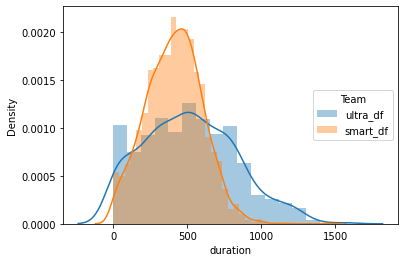

In [33]:
#Строим парные гистограммы для тарифных планов. Звонки

sns.distplot(ultra_df['duration'],label ='ultra_df');
sns.distplot(smart_df['duration'],label ='smart_df');
plt.legend(loc='center right', title='Team')


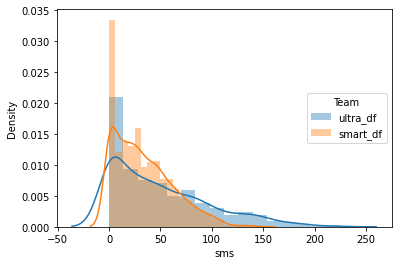

In [34]:
#Смс
sns.distplot(ultra_df['sms'],label ='ultra_df');
sns.distplot(smart_df['sms'],label ='smart_df');
plt.legend(loc='center right', title='Team')

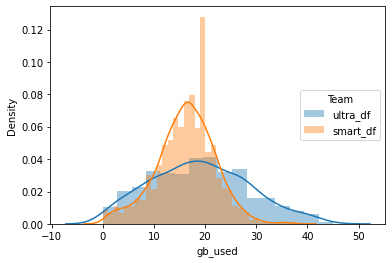

In [35]:
#Интернет (подозрительный пик в районе 20 гб)
sns.distplot(ultra_df['gb_used'],label ='ultra_df');
sns.distplot(smart_df['gb_used'],label ='smart_df');
plt.legend(loc='center right', title='Team')

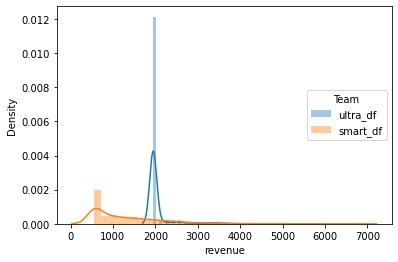

In [36]:
#Интернет
sns.distplot(ultra_df['revenue'],label ='ultra_df');
sns.distplot(smart_df['revenue'],label ='smart_df');
plt.legend(loc='center right', title='Team')

### Проверка гипотез <a class ="anchor" id="chapter3.3"></a>

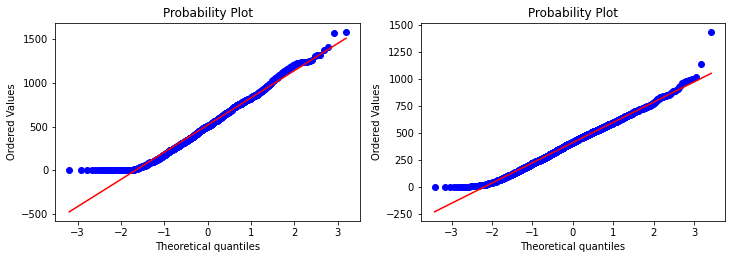

Shapiro-Wilk normality test, W-statistic: 0.980360, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.993898, p-value: 0.000000


In [37]:
# Чтобы понять, какой критерий лучше пименять, проверяем нормальность распределений при помощи QQ-графиков и метода Шапиро-Уилка
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(ultra_df['duration'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(smart_df['duration'], dist="norm", plot=plt)
plt.show()

print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(ultra_df['duration']))
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(smart_df['duration']))

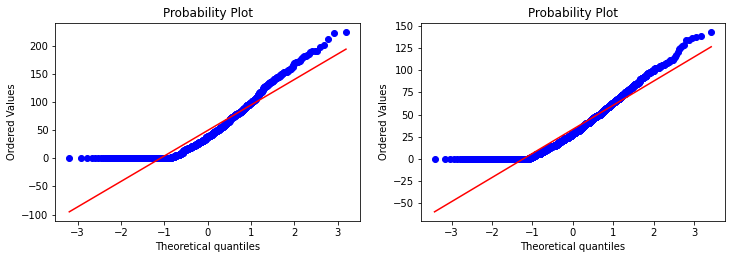

Shapiro-Wilk normality test, W-statistic: 0.889942, p-value: 0.000000
Shapiro-Wilk normality test, W-statistic: 0.926238, p-value: 0.000000


In [38]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(ultra_df['sms'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(smart_df['sms'], dist="norm", plot=plt)
plt.show()

print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(ultra_df['sms']))
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(smart_df['sms']))

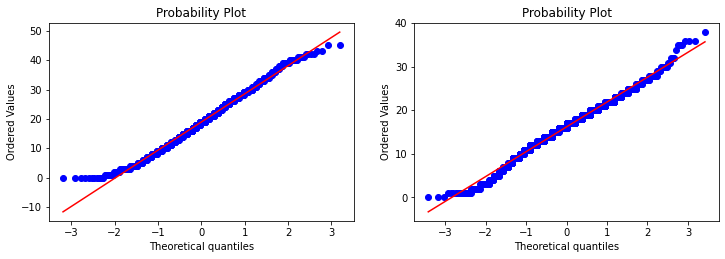

Shapiro-Wilk normality test, W-statistic: 0.988797, p-value: 0.000001
Shapiro-Wilk normality test, W-statistic: 0.990283, p-value: 0.000000


In [39]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(ultra_df['gb_used'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(smart_df['gb_used'], dist="norm", plot=plt)
plt.show()

print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(ultra_df['gb_used']))
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(smart_df['gb_used']))

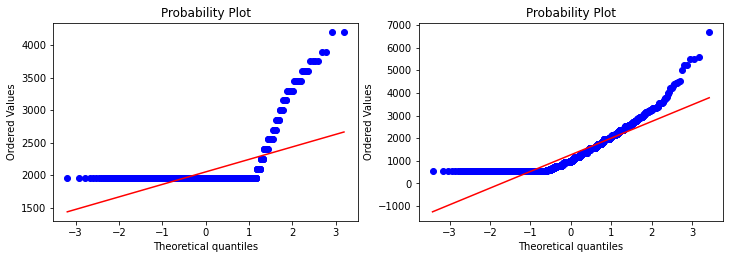

Shapiro-Wilk normality test, W-statistic: 0.988797, p-value: 0.000001
Shapiro-Wilk normality test, W-statistic: 0.990283, p-value: 0.000000


In [40]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(ultra_df['revenue'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(smart_df['revenue'], dist="norm", plot=plt)
plt.show()

print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(ultra_df['gb_used']))
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(smart_df['gb_used']))

При alpha=0.05 распределения нельзя считать нормальными. Поэтому параметрические тесты, в частности ttest применять нельзя. Применим непараметрический тест Манна-Уитни.


Сформулируем нулевую и альтернативную гипотезы для двухстороннего теста.

𝐻0:Средние выручки пользователей тарифов «Ультра» и «Смарт» равны. 

𝐻1:Средние выручки пользователей тарифов «Ультра» и «Смарт» отличаются.

Зададим уровень значимости:  𝛼=0.05

In [41]:
#Двухсторонний тест
alpha = 0.05
results = st.mannwhitneyu(ultra_df['revenue'], smart_df['revenue'], alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.504511746613403e-194
Отвергаем нулевую гипотезу


Сформулируем нулевую и альтернативную гипотезы для одностооаннего теста.

𝐻0:Средние выручки пользователей тарифов «Ультра» и «Смарт» равны.

𝐻1:Средняя выручка пользователей тарифов «Ультра» больше средней выручки пользователей тарифа «Смарт».

Зададим уровень значимости: 𝛼=0.05

In [42]:
results = st.mannwhitneyu(ultra_df['revenue'], smart_df['revenue'], alternative='greater')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.7522558733067014e-194
Отвергаем нулевую гипотезу


Таким обраом тест показывает, что предположение о равенстве выручки клиентов тарифов не сооответствует действительности и **клиенты с  тарифом "Ультра" платят больше** и поэтому на его продвижении стоит сконцентроваться маркетинговому отделу.

In [43]:
moscow_set = merged.query('city == "Москва"')
other_set = merged.query('city != "Москва"')
print('В Москве средняя выручка составляет:', moscow_set['revenue'].mean(),', медианная:', moscow_set['revenue'].median())
print('В остальных регионах средняя выручка составляет:', other_set['revenue'].mean(),', медианная:', other_set['revenue'].median())
print('Разница составляет соответственно', moscow_set['revenue'].mean()/other_set['revenue'].mean(),' и ', moscow_set['revenue'].median()/other_set['revenue'].median()) 



В Москве средняя выручка составляет: 1524.5908346972176 , медианная: 1750.0
В остальных регионах средняя выручка составляет: 1503.1547024952015 , медианная: 1550.0
Разница составляет соответственно 1.0142607624926647  и  1.1290322580645162


Сформулируем нулевую и альтернативную гипотезы (двухсторонний тест).

𝐻0:Средние выручки пользователей в Москве и остальных регионах совпадают.

𝐻1:Средние выручки пользователей в Москве и остальных регионах отличаются.

Зададим уровень значимости: 𝛼=0.05

In [44]:
results = st.mannwhitneyu(moscow_set['revenue'], other_set['revenue'],alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.3607165119837814
Не получилось отвергнуть нулевую гипотезу


Сформулируем нулевую и альтернативную гипотезы (односторонний тест).

𝐻0:Средние выручки пользователей в Москве и остальных регионах совпадают.

𝐻1:Средние выручки пользователей в Москве больше средней выручки в остальных регионах регионах отличаются.


In [45]:
alpha = 0.05

results = st.mannwhitneyu(moscow_set['revenue'], other_set['revenue'],alternative='greater')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.1803582559918907
Не получилось отвергнуть нулевую гипотезу


По итогам проведения статистических тестов по критерию Манна-Уитни можно констатировать, что средние месячные выручки на тарифных планах нельзя считать равными. Средняя выручка на плане "Ультра" значительно выше. При этом нельзя сказать, что средняя выручка в Москве больше, чем других регионах. Нулевую гипотезу о равенстве средних выручек пользователей в Москве и регионах не получается отвергнуть. Это подтверждается сравнительно небольшой разницей в средней выручке на человека между Москвой и регионами (1,4%). При том различия в медианной выручке более значимы и составляют почти 13%. 

## Общий вывод <a class ="anchor" id="chapter4"></a>

1. Представленные наборы данных обладают сравнительно неплохим качеством и содержат пропуски только в одном столбце набора users - 'churn_date'. Они могут быть легко заменены на значение "действующего" абонента. 


2. Потребление услуг у пользователей планов "Смарт" и "Ультра" отличается. Так **на "Смарте" медианное месячное потребление услуг составляет 414 минут, 28 смс и 16 гб интернет-трафика, а на "Ультре" 506 минут, 38 смс и 19 гб интернет-трафика**.


3. Интересно, что медианный клиент на "Ультре" при аналогичном потреблении услуг на "Смарте" экономил бы порядка 582 рубля. Иначе говоря, многие клиенты на "Ультре" не осваивают объемы оплачиваемых услуг. Например, медианный клиент на этом плане тратит всего 19 гб интернета при включенных в абонентскую плату 30 гб. Поэтому **с точки зрения продаж и рентабельности, продвижение "Ультры" является предпочтительным**.


4. Статистические тесты показывают, что предположение о равенстве выручки клиентов двух тарифных планов не сооответствует действительности и клиенты с тарифом "Ультра" платят больше и поэтому на его продвижении стоит сконцентроваться маркетинговому отделу.


5. Средняя выручка клиентов в Москве и остальных регионах почти не отличается (всего на 1,4%). По медиане разрыв сильнее в пользу "Ультры" (на 13%). При статистических тестах нулевую гипотезу о равенстве платежей в Москве и регионах отвергнуть не получается, что говорит о не слишком большой диференциации в размерах платежей клиентов между Москвой и регионами. 